In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/Bengali_db

/content/drive/My Drive/Bengali_db


In [4]:
ls

'Bengali Ethnicity'/   ttdata.zip


In [0]:
cp ttdata.zip /content/

In [6]:
cd /content/

/content


In [7]:
!unzip ttdata.zip

Archive:  ttdata.zip
   creating: data/
   creating: data/train/
   creating: data/train/Bengali Female/
  inflating: data/train/Bengali Female/_2.jpg  
  inflating: data/train/Bengali Female/_50451259_nuzratjahan1.jpg  
  inflating: data/train/Bengali Female/_64627012_mentor.jpg  
  inflating: data/train/Bengali Female/_79533541_1c143da8-1013-4f12-b2db-becf34e8cd71.jpg  
  inflating: data/train/Bengali Female/_103791366_img_5716.jpg  
  inflating: data/train/Bengali Female/_105687929_hi052405936-1.jpg  
  inflating: data/train/Bengali Female/_106346936_img_4700.jpg  
  inflating: data/train/Bengali Female/_106347044_img_4728.jpg  
  inflating: data/train/Bengali Female/_106347681_img_5049.jpg  
  inflating: data/train/Bengali Female/0be4fc0abadf850c1246a82f76b22f14--artists.jpg  
  inflating: data/train/Bengali Female/0ce2459358a0ae9ec3564f10a7a82ef3--west-bengal-indian-beauty.jpg  
  inflating: data/train/Bengali Female/0ebbda56ff10ad3013c762b584cfb02f.jpg  
  inflating: data/train/B

In [13]:
cd /content/

/content


In [14]:
ls

data/  drive/  sample_data/  ttdata.zip


In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras
print("TensorFlow version is ", tf.__version__)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

TensorFlow version is  1.14.0


In [26]:
cd data

/content/data


In [27]:

train_dir = 'train'
validation_dir = 'test'

# Directory with our training cat pictures
train_female_dir = os.path.join(train_dir, 'Bengali Female')
print ('Total training female images:', len(os.listdir(train_female_dir)))

# Directory with our training dog pictures
train_male_dir = os.path.join(train_dir, 'Bengali Male')
print ('Total training male images:', len(os.listdir(train_male_dir)))

# Directory with our validation cat pictures
validation_female_dir = os.path.join(validation_dir, 'Bengali Female')
print ('Total validation female images:', len(os.listdir(validation_female_dir)))

# Directory with our validation dog pictures
validation_male_dir = os.path.join(validation_dir, 'Bengali Male')
print ('Total validation male images:', len(os.listdir(validation_male_dir)))

Total training female images: 1714
Total training male images: 1729
Total validation female images: 420
Total validation male images: 475


In [28]:
image_size = 160 # All images will be resized to 160x160
batch_size = 32

# Rescale all images by 1./255 and apply image augmentation
train_datagen = keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255)

validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
                train_dir,  # Source directory for the training images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                # Since we use binary_crossentropy loss, we need binary labels
                class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
                validation_dir, # Source directory for the validation images
                target_size=(image_size, image_size),
                batch_size=batch_size,
                class_mode='binary')

Found 3443 images belonging to 2 classes.
Found 895 images belonging to 2 classes.


In [29]:
IMG_SHAPE = (image_size, image_size, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

W0810 12:27:57.787696 140148059191168 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


9412608/9406464 [==============================] - 0s 0us/step


In [0]:
base_model.trainable = False

In [31]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
model = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0810 12:28:58.029913 140148059191168 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [35]:
len(model.trainable_variables)

2

In [36]:
epochs = 10
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=4,
                              validation_data=validation_generator,
                              validation_steps=validation_steps)

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:2496: DecompressionBombWarning: Image size (139489119 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


 66/107 [=================>............] - ETA: 20s - loss: 0.7469 - acc: 0.5241

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 99/107 [==========================>...] - ETA: 3s - loss: 0.7271 - acc: 0.5439

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 33685504 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 47185920 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2359296 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to re

107/107 [==============================] - 66s 612ms/step - loss: 0.7219 - acc: 0.5494 - val_loss: 0.6725 - val_acc: 0.6100
Epoch 2/10
107/107 [==============================] - 63s 585ms/step - loss: 0.6185 - acc: 0.6678 - val_loss: 0.5588 - val_acc: 0.7188
Epoch 3/10
107/107 [==============================] - 63s 584ms/step - loss: 0.5462 - acc: 0.7300 - val_loss: 0.4991 - val_acc: 0.7720
Epoch 4/10
107/107 [==============================] - 62s 578ms/step - loss: 0.4880 - acc: 0.7813 - val_loss: 0.4462 - val_acc: 0.8044
Epoch 5/10
107/107 [==============================] - 62s 576ms/step - loss: 0.4651 - acc: 0.7968 - val_loss: 0.4158 - val_acc: 0.8218
Epoch 6/10
107/107 [==============================] - 62s 576ms/step - loss: 0.4376 - acc: 0.8109 - val_loss: 0.3951 - val_acc: 0.8380
Epoch 7/10
107/107 [==============================] - 61s 572ms/step - loss: 0.4165 - acc: 0.8247 - val_loss: 0.3769 - val_acc: 0.8380
Epoch 8/10
107/107 [==============================] - 61s 573ms/st

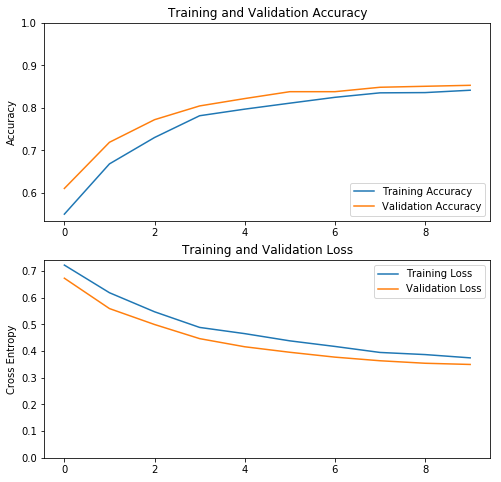

In [37]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [0]:
#FINE TUNING


In [0]:
base_model.trainable = True

In [39]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


In [0]:

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
_________________________________________________________________


In [42]:
len(model.trainable_variables)

58

In [43]:
history_fine = model.fit_generator(train_generator,
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs,
                                   workers=4,
                                   validation_data=validation_generator,
                                   validation_steps=validation_steps)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:2496: DecompressionBombWarning: Image size (139489119 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


Epoch 1/10
 23/107 [=====>........................] - ETA: 54s - loss: 0.3405 - acc: 0.8641

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


 63/107 [================>.............] - ETA: 21s - loss: 0.3177 - acc: 0.8687

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 33685504 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 47185920 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2359296 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to re

107/107 [==============================] - 66s 616ms/step - loss: 0.3252 - acc: 0.8631 - val_loss: 0.2903 - val_acc: 0.8877
Epoch 2/10
107/107 [==============================] - 64s 594ms/step - loss: 0.2317 - acc: 0.9135 - val_loss: 0.2645 - val_acc: 0.8924
Epoch 3/10
107/107 [==============================] - 63s 590ms/step - loss: 0.1802 - acc: 0.9349 - val_loss: 0.2646 - val_acc: 0.8912
Epoch 4/10
107/107 [==============================] - 63s 585ms/step - loss: 0.1392 - acc: 0.9525 - val_loss: 0.2691 - val_acc: 0.8935
Epoch 5/10
107/107 [==============================] - 63s 588ms/step - loss: 0.1030 - acc: 0.9666 - val_loss: 0.2649 - val_acc: 0.8981
Epoch 6/10
107/107 [==============================] - 62s 579ms/step - loss: 0.0907 - acc: 0.9757 - val_loss: 0.2625 - val_acc: 0.9028
Epoch 7/10
107/107 [==============================] - 62s 582ms/step - loss: 0.0685 - acc: 0.9830 - val_loss: 0.2688 - val_acc: 0.9051
Epoch 8/10
107/107 [==============================] - 62s 582ms/st

In [0]:
acc += history_fine.history['acc']
val_acc += history_fine.history['val_acc']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

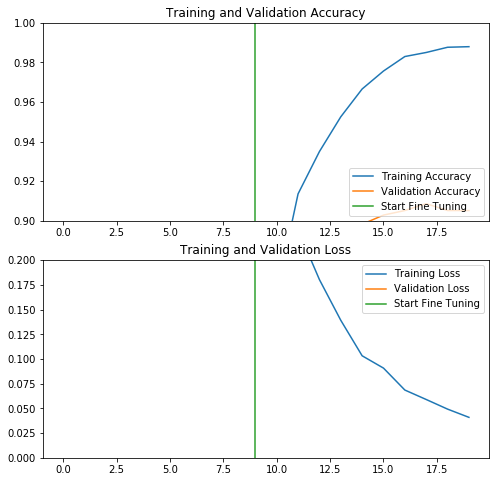

In [46]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.9, 1])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 0.2])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
#to see both of the sides of the graph just set the number of epochs 50 or higher!

model.save('mobnetV2.h5')